#**Predicting price of bitcoin using lstm**

##**Importing necessary libraries**

In [ ]:
#Data manipulation libraries
import numpy as np
import pandas as pd
#Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


##**Data Exploration**

In [ ]:
#reading the csv file
data=pd.read_csv("btc_pred.csv",parse_dates=True)

In [ ]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,07-01-2017,903.487000,908.585022,823.556030,908.585022,908.585022,279550016
1,08-01-2017,908.174988,942.723999,887.249023,911.198975,911.198975,158715008
2,09-01-2017,913.244019,913.685974,879.807007,902.828003,902.828003,141876992
3,10-01-2017,902.440002,914.872986,901.059998,907.679016,907.679016,115808000
4,11-01-2017,908.114990,919.447998,762.765015,777.757019,777.757019,310928992
5,12-01-2017,775.177979,826.245972,755.755981,804.833984,804.833984,222326000
6,13-01-2017,803.737000,829.000977,780.002991,823.984009,823.984009,168968000
7,14-01-2017,825.142029,835.085022,812.455994,818.411987,818.411987,93063296
8,15-01-2017,818.142029,823.307007,812.870972,821.797974,821.797974,71013600
9,16-01-2017,821.783020,834.530029,820.270996,831.533997,831.533997,82755200


In [ ]:
data.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1817,29-12-2021,14479.6499,15361.7998,13658.30029,14600.9502,14600.9502,30049226299
1818,30-12-2021,14479.6499,15361.7998,13658.30029,14600.9502,14600.9502,26686491018
1819,31-12-2021,14479.6499,15361.7998,13658.30029,14600.9502,14600.9502,32781672711
1820,01-01-2022,14479.6499,15361.7998,13658.30029,14600.9502,14600.9502,24582667004
1821,02-01-2022,14479.6499,15361.7998,13658.30029,14600.9502,14600.9502,27951569547
1822,03-01-2022,14479.6499,15361.7998,13658.30029,14600.9502,14600.9502,33071628362
1823,04-01-2022,14479.6499,15361.7998,13658.30029,14600.9502,14600.9502,32781672711
1824,05-01-2022,14479.6499,15361.7998,13658.30029,14600.9502,14600.9502,32781672711
1825,06-01-2022,14479.6499,15361.7998,13658.30029,14600.9502,14600.9502,30208048289
1826,07-01-2022,14479.6499,15361.7998,13658.30029,14600.9502,14600.9502,32781672711


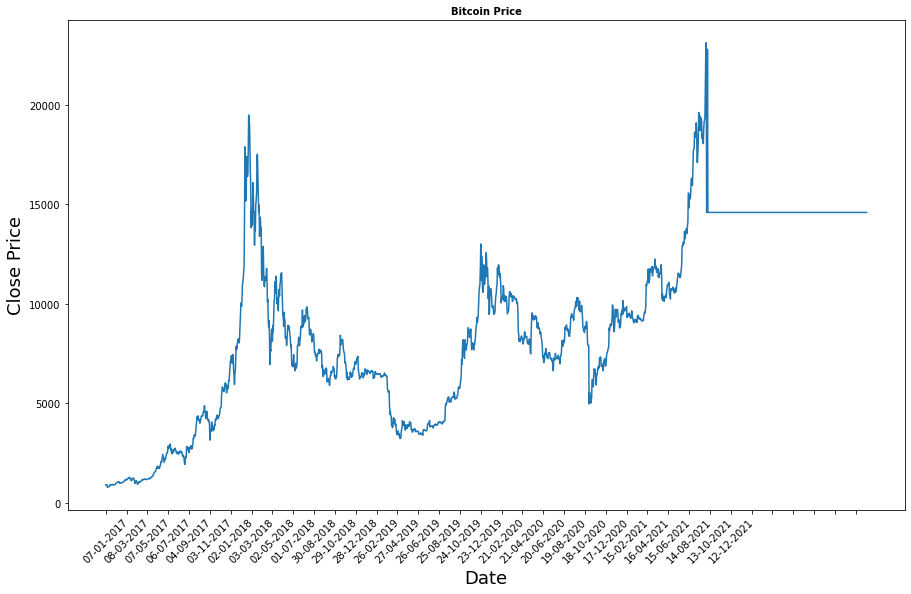

In [ ]:
#Creating a dataframe for closing price which is our target variable to predict
price=data[['Close']]
#Plotting the price for historical data of bitcoin
plt.figure(figsize=(15,9))
plt.plot(price)
plt.xticks(range(0,data.shape[0],50),data['Date'].loc[::60],rotation=45)
plt.title('Bitcoin Price',fontsize=10,fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

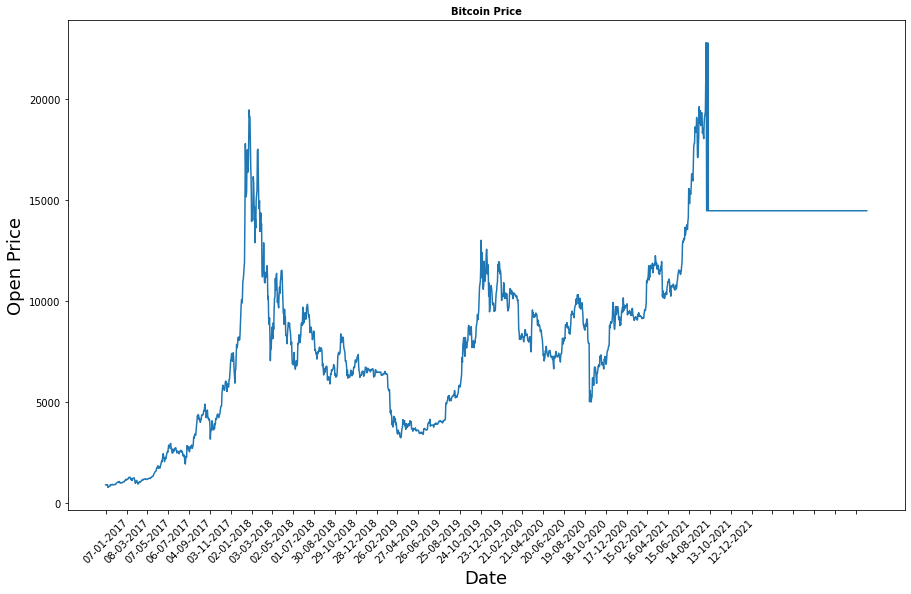

In [ ]:
#Creating a dataframe for closing price which is our target variable to predict
price=data[['Open']]
#Plotting the price for historical data of bitcoin
plt.figure(figsize=(15,9))
plt.plot(price)
plt.xticks(range(0,data.shape[0],50),data['Date'].loc[::60],rotation=45)
plt.title('Bitcoin Price',fontsize=10,fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Open Price',fontsize=18)
plt.show()

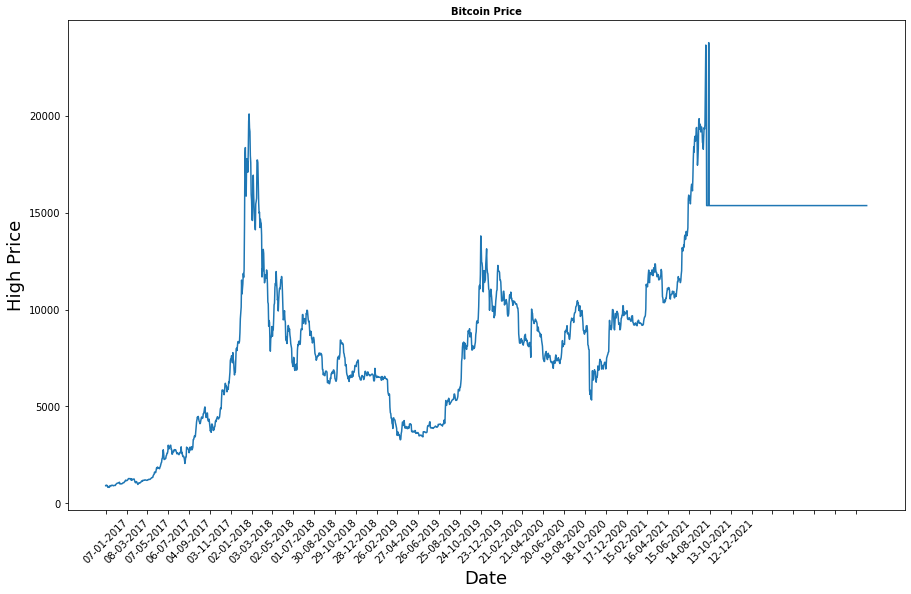

In [ ]:
#Creating a dataframe for closing price which is our target variable to predict
price=data[['High']]
#Plotting the price for historical data of bitcoin
plt.figure(figsize=(15,9))
plt.plot(price)
plt.xticks(range(0,data.shape[0],50),data['Date'].loc[::60],rotation=45)
plt.title('Bitcoin Price',fontsize=10,fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('High Price',fontsize=18)
plt.show()

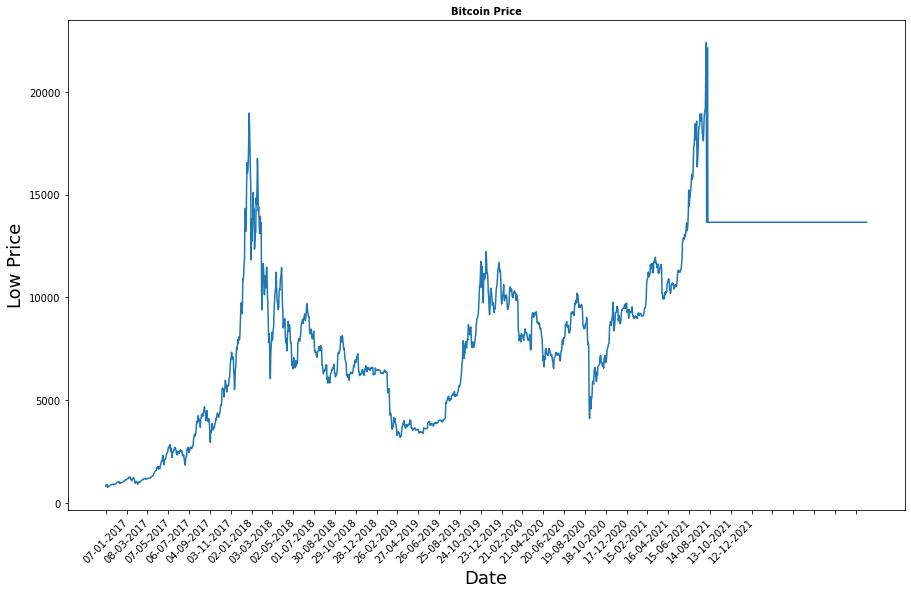

In [ ]:
#Creating a dataframe for closing price which is our target variable to predict
price=data[['Low']]
#Plotting the price for historical data of bitcoin
plt.figure(figsize=(15,9))
plt.plot(price)
plt.xticks(range(0,data.shape[0],50),data['Date'].loc[::60],rotation=45)
plt.title('Bitcoin Price',fontsize=10,fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Low Price',fontsize=18)
plt.show()

In [ ]:
price #price dataset

,Low
0,823.556030
1,887.249023
2,879.807007
3,901.059998
4,762.765015
...,...
1822,13658.300290
1823,13658.300290
1824,13658.300290
1825,13658.300290


In [ ]:
#summary of price dataset
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Low     1827 non-null   float64
dtypes: float64(1)
memory usage: 14.4 KB


##**DATA PREPARATION**
**Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
norm_data = min_max_scaler.fit_transform(price.values)

In [ ]:
norm_data

array([[0.0031325 ],
       [0.00607525],
       [0.00573141],
       ...,
       [0.59612413],
       [0.59612413],
       [0.59612413]])

#**DATA SPLIT**

In [ ]:
def univariate_data(dataset,start_index,end_index,history_size,target_size):
  data=[]
  labels=[]
  start_index=start_index+history_size
  if end_index is None:
    end_index=len(dataset)-target_size
  for i in range(start_index,end_index):
    indices=range(i-history_size,i)
    data.append(np.reshape(dataset[indices],(history_size,1)))
    labels.append(dataset[i+target_size])
  return np.array(data),np.array(labels)

past_history=5
future_target=0
#we need to use 5 days of data to learn to predict next point in time series

Train_split=int(len(norm_data)*0.8)
x_train,y_train=univariate_data(norm_data,0,Train_split,past_history,future_target)
x_test,y_test=univariate_data(norm_data,0,Train_split,past_history,future_target)

#**BUILDING MODEL**

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,LeakyReLU


num_units=64
learning_rate=0.001
activation_function='sigmoid'
adam=keras.optimizers.Adam(lr=learning_rate)
loss_function='mse'
batch_size=5
num_epochs=250
#Initialize the RNN
model = Sequential() 
model.add(LSTM(units=num_units,activation=activation_function,input_shape=(None,1)))
model.add(LeakyReLU(alpha=0.05))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.compile(optimizer=adam,loss=loss_function)
model.summary()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


##**TEST THE MODEL**

In [ ]:
history=model.fit(x_train,y_train,validation_split=0.1,batch_size=batch_size,epochs=num_epochs,shuffle=False)
                 
                  

Epoch 1/250
262/262 [==============================] - 3s 5ms/step - loss: 0.0218 - val_loss: 0.0286
Epoch 2/250
262/262 [==============================] - 1s 4ms/step - loss: 0.0215 - val_loss: 0.0454
Epoch 3/250
262/262 [==============================] - 1s 3ms/step - loss: 0.0189 - val_loss: 0.0425
Epoch 4/250
262/262 [==============================] - 1s 4ms/step - loss: 0.0175 - val_loss: 0.0437
Epoch 5/250
262/262 [==============================] - 1s 4ms/step - loss: 0.0158 - val_loss: 0.0420
Epoch 6/250
262/262 [==============================] - 1s 4ms/step - loss: 0.0159 - val_loss: 0.0414
Epoch 7/250
262/262 [==============================] - 1s 3ms/step - loss: 0.0154 - val_loss: 0.0440
Epoch 8/250
262/262 [==============================] - 1s 4ms/step - loss: 0.0149 - val_loss: 0.0416
Epoch 9/250
262/262 [==============================] - 1s 3ms/step - loss: 0.0147 - val_loss: 0.0431
Epoch 10/250
262/262 [==============================] - 1s 3ms/step - loss: 0.0144 - val_lo

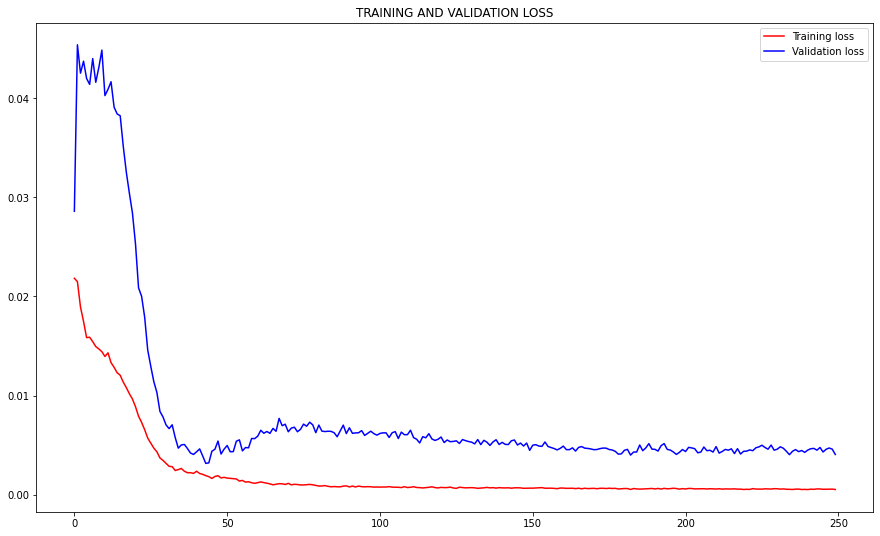

In [ ]:
loss = history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(loss))

plt.figure(figsize=(15,9))
plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('TRAINING AND VALIDATION LOSS')
plt.legend()

plt.show()

[]

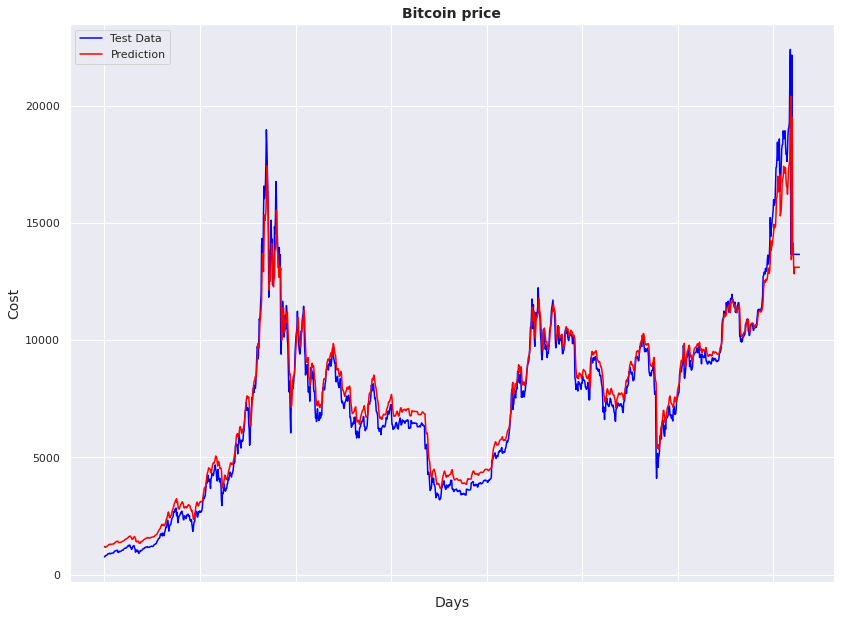

In [ ]:
original=pd.DataFrame(min_max_scaler.inverse_transform(y_test))
predictions=pd.DataFrame(min_max_scaler.inverse_transform(model.predict(x_test)))
sns.set(rc={'figure.figsize':(11.7+2,8.27+2)})
ax=sns.lineplot(x=original.index,y=original[0],label='Test Data',color='blue')
ax=sns.lineplot(x=predictions.index,y=predictions[0],label='Prediction',color='red')
ax.set_title('Bitcoin price',size=14,fontweight='bold')
ax.set_xlabel('Days',size=14)
ax.set_ylabel('Cost',size=14)
ax.set_xticklabels('',size=10)